### Excercise : Create Pipeline

In [57]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_data = Pipeline([
    ('fill_missing', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaling', StandardScaler())
])

num_data

Pipeline(steps=[('fill_missing', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])

### Load dataset

In [31]:
df = pd.read_csv('dataset/data.csv')
df.shape

(569, 33)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [34]:
df['Unnamed: 32'].value_counts()

Series([], Name: count, dtype: int64)

In [35]:
len(df['id'].unique())

569

In [36]:
# dropping entirely null value column
print(df.shape)
df1 = df.drop(['id', 'Unnamed: 32'], axis=1)
df1.shape

(569, 33)


(569, 31)

## Get All Numerical columns name

In [37]:
numeric_cols = df1.select_dtypes(exclude='object').columns

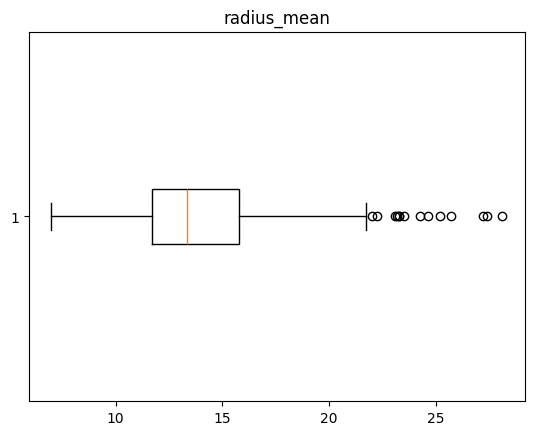

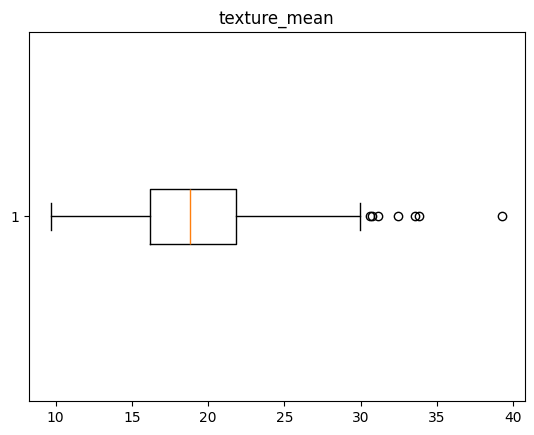

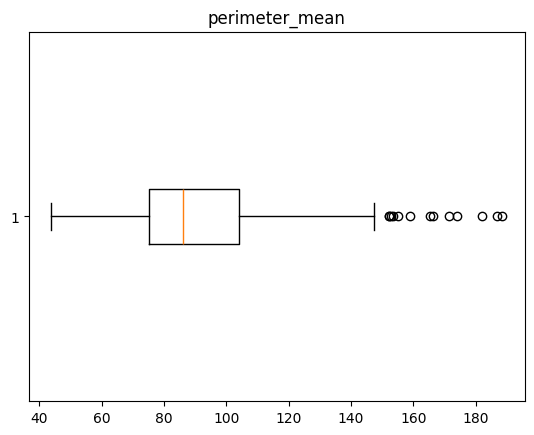

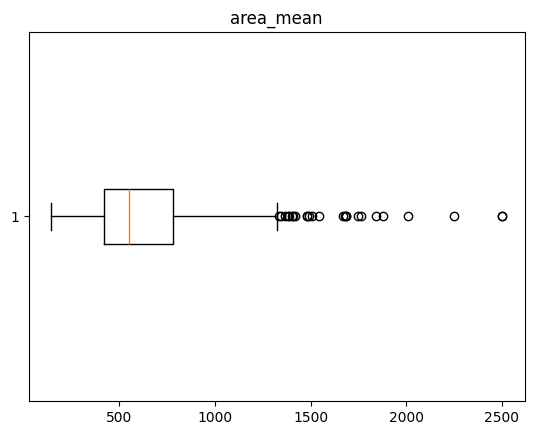

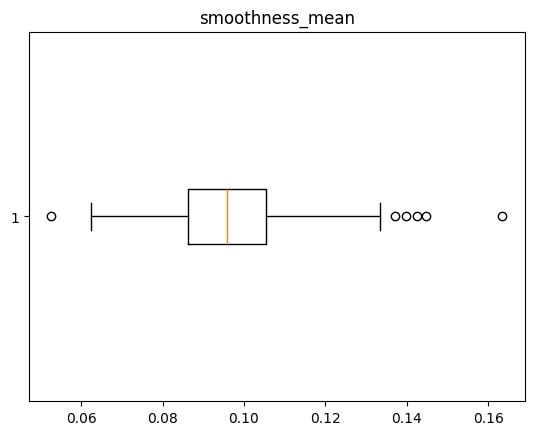

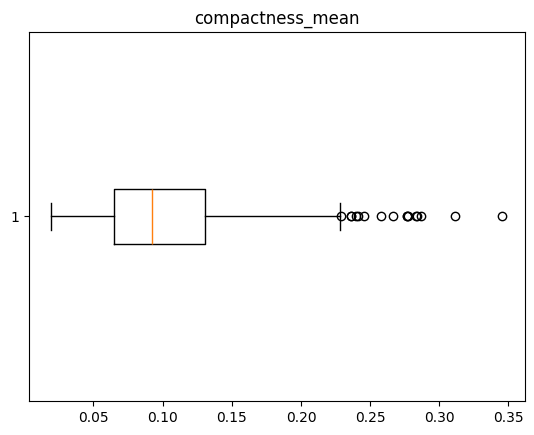

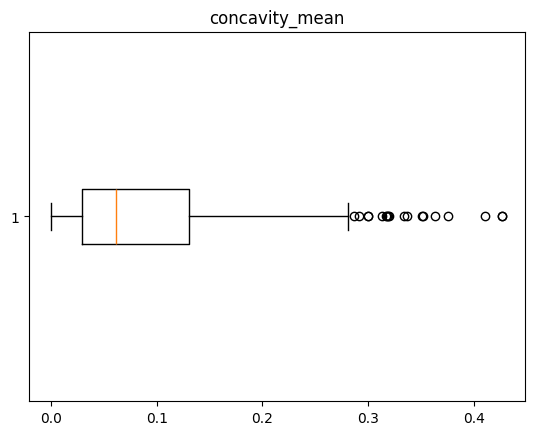

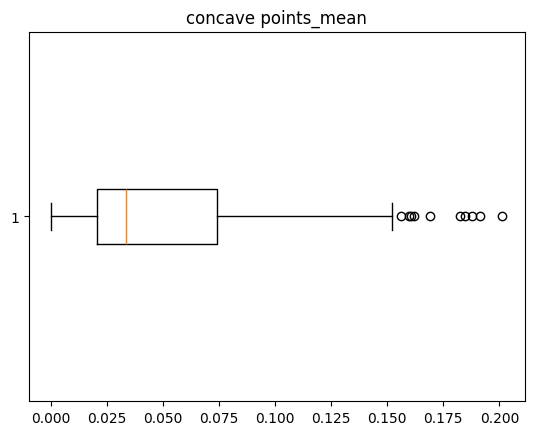

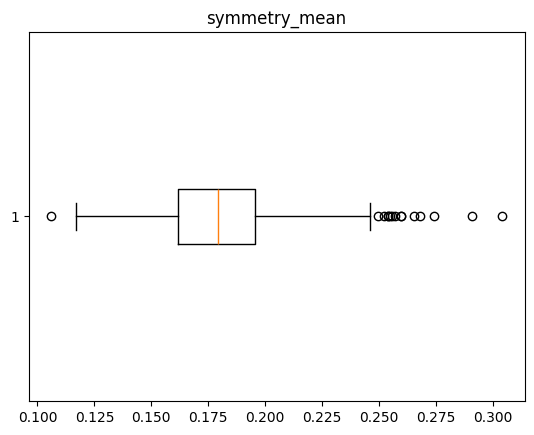

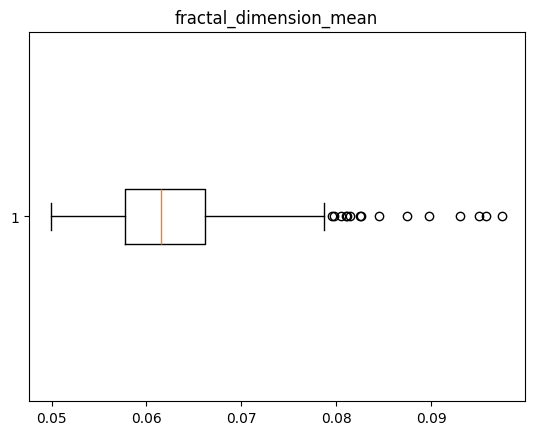

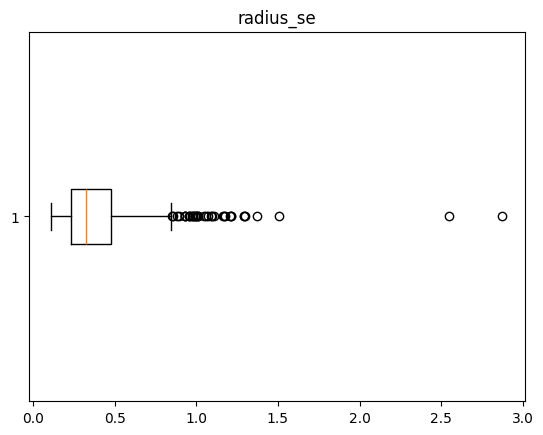

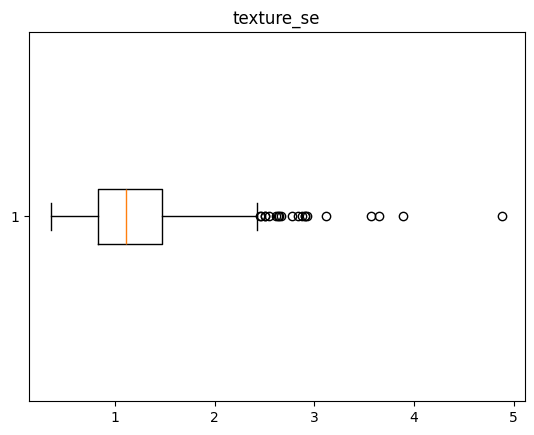

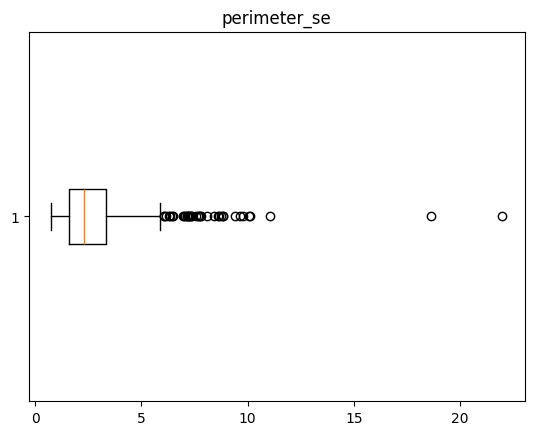

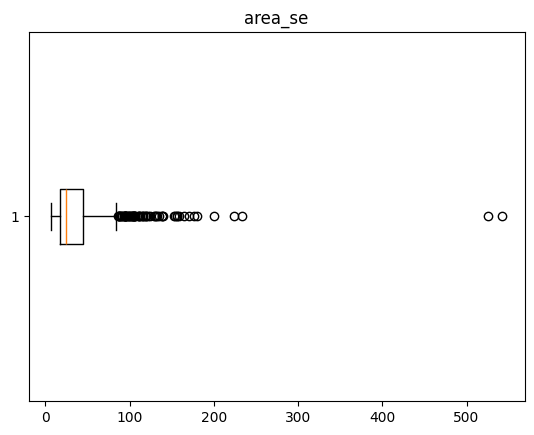

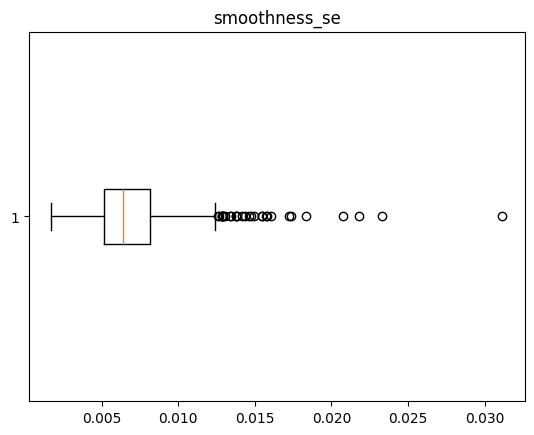

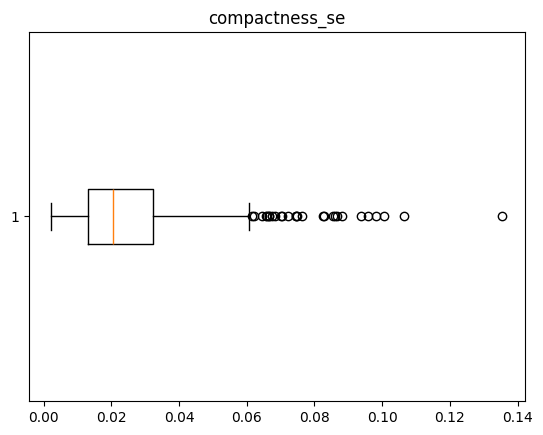

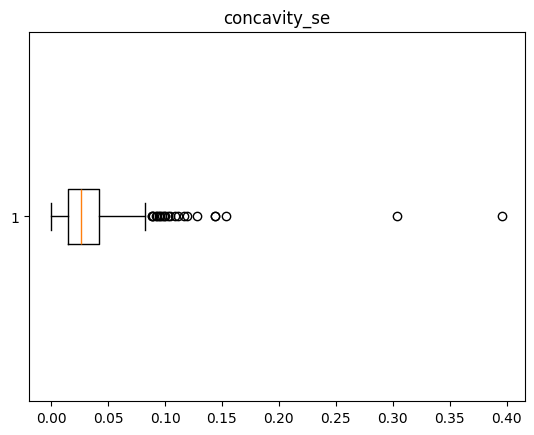

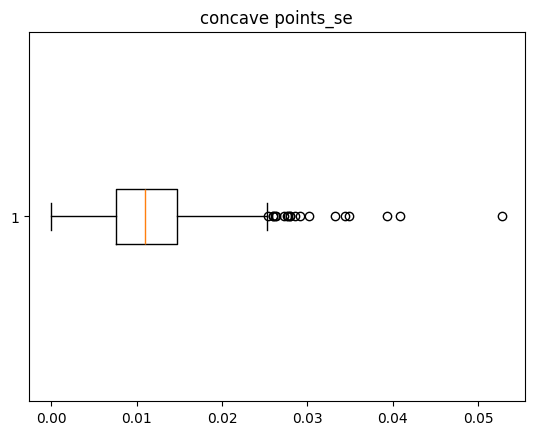

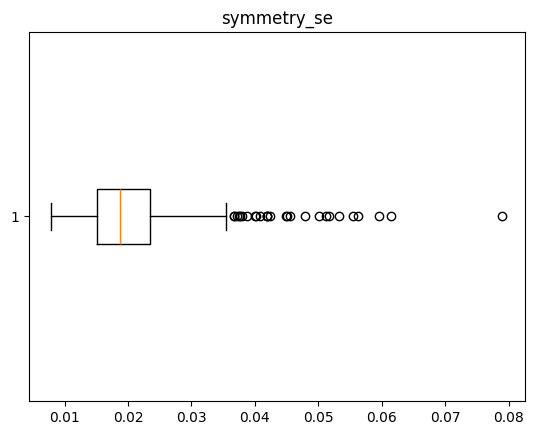

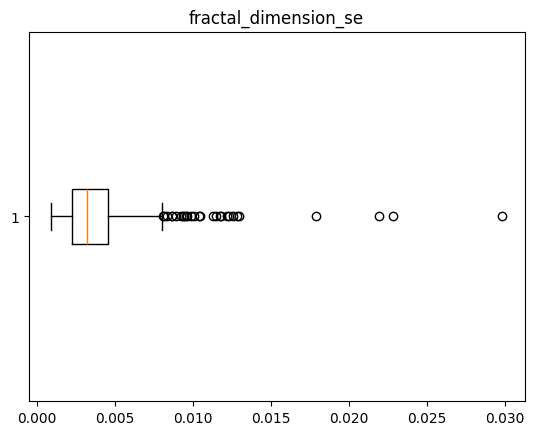

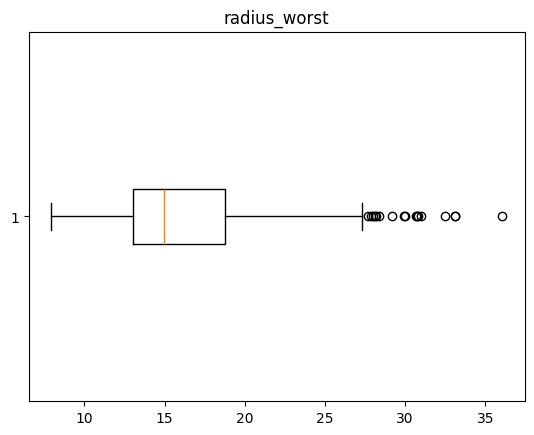

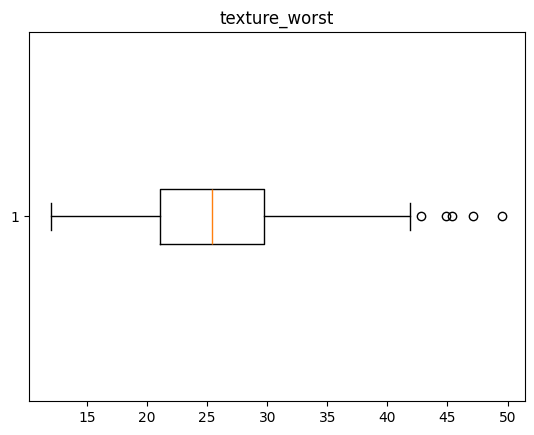

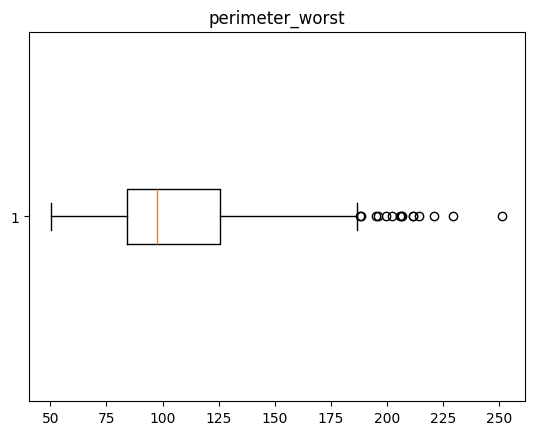

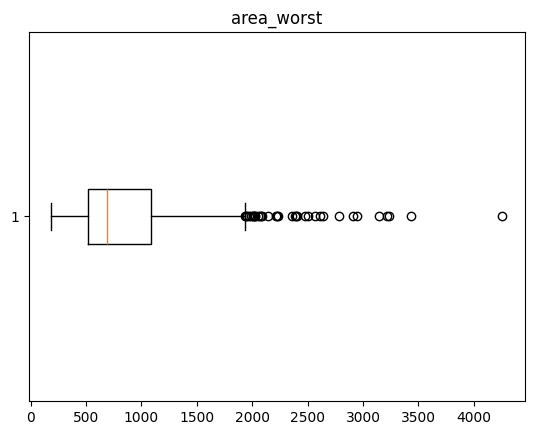

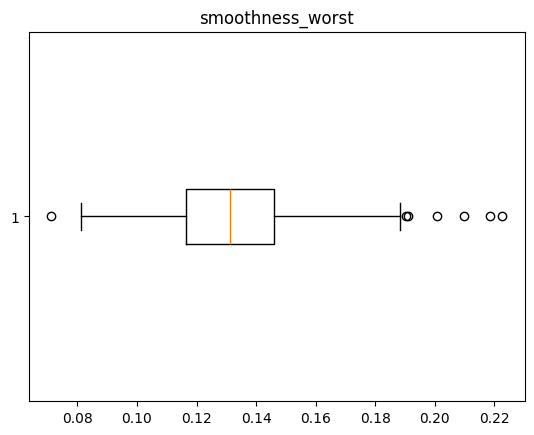

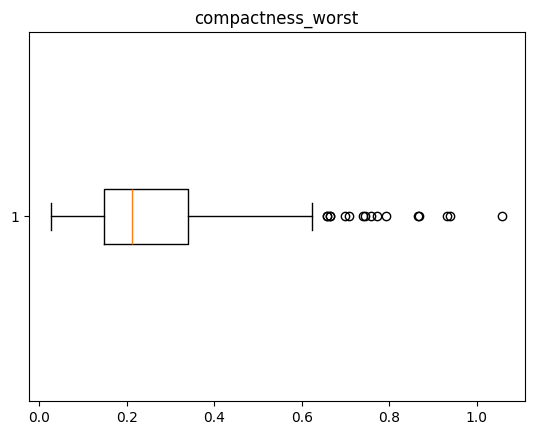

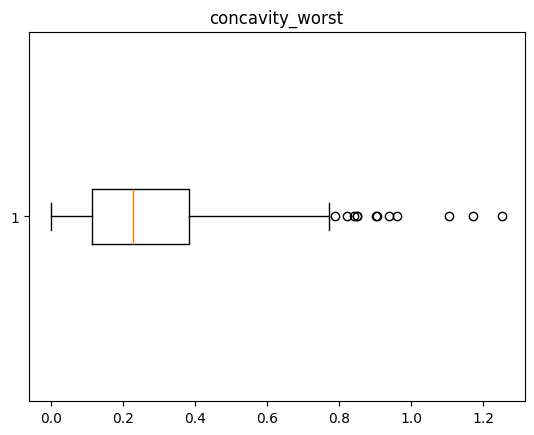

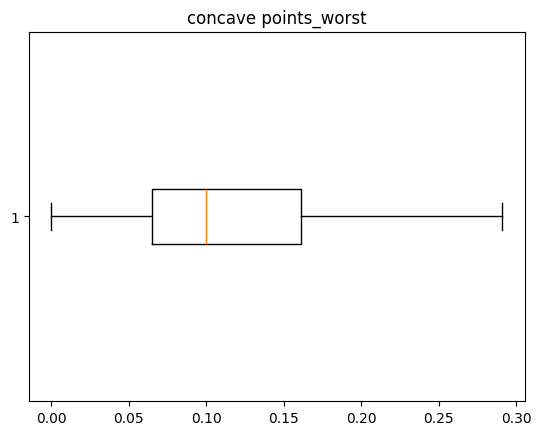

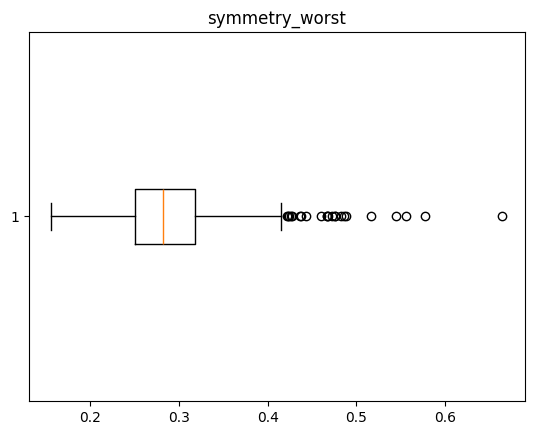

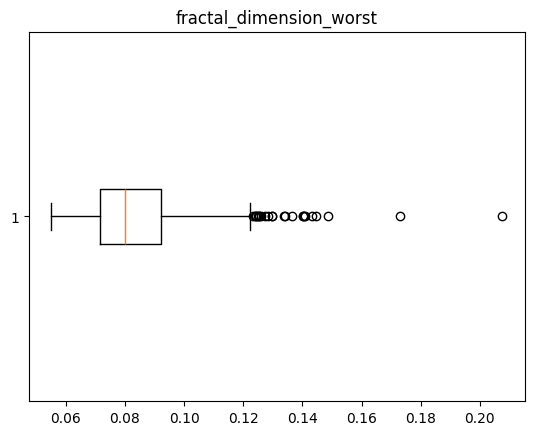

In [38]:
for i in numeric_cols:
    plt.boxplot(df1[i], vert=False)
    plt.title(i)
    plt.show()

## Removing Outliers

In [39]:
def remove_outlier(vector):
    q1, q3 = np.percentile(vector,[25,75])
    iqr = q3 - q1
    hf = q3 + 1.5 * iqr
    lf = q1 - 1.5 * iqr

    return lf, hf

5.579999999999999 21.9


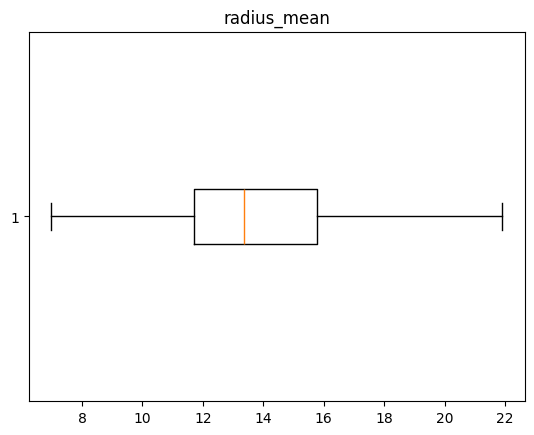

7.725000000000003 30.244999999999997


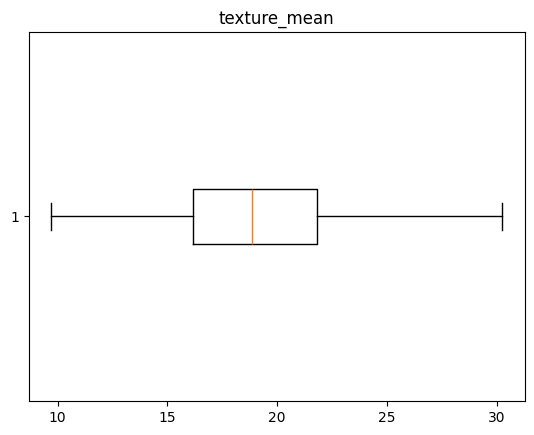

31.775000000000013 147.49499999999998


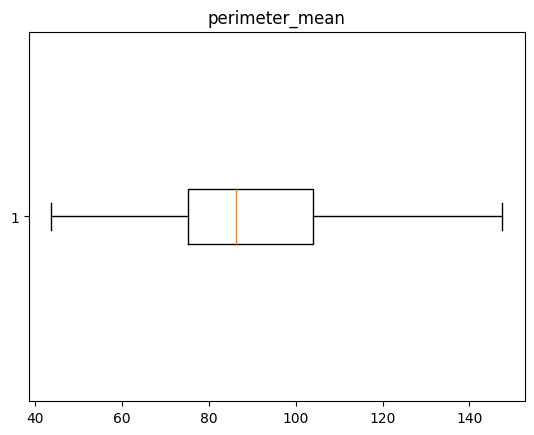

-123.30000000000001 1326.3000000000002


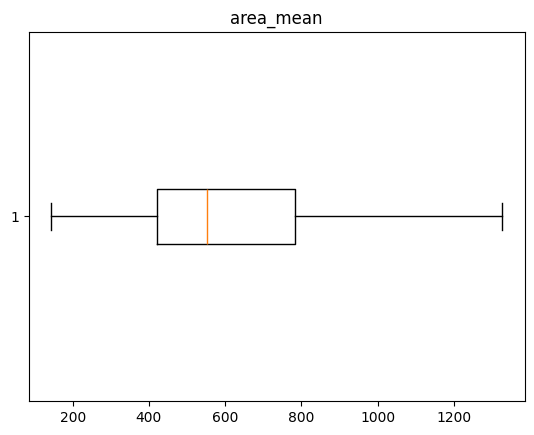

0.057975 0.133695


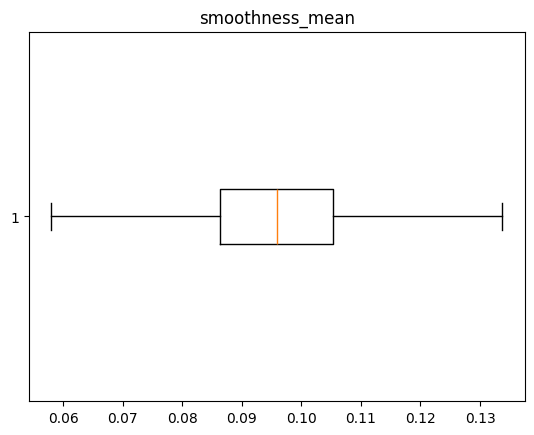

-0.03329999999999997 0.22861999999999996


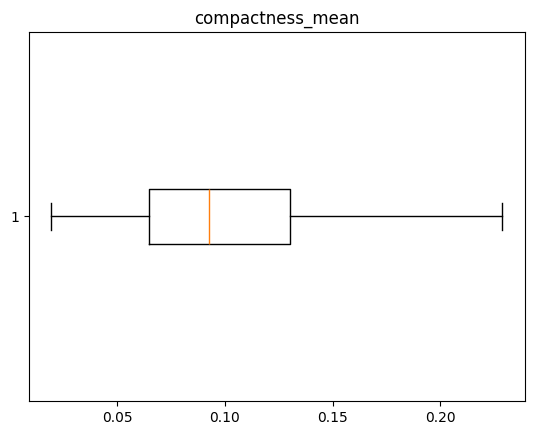

-0.12215000000000001 0.28241000000000005


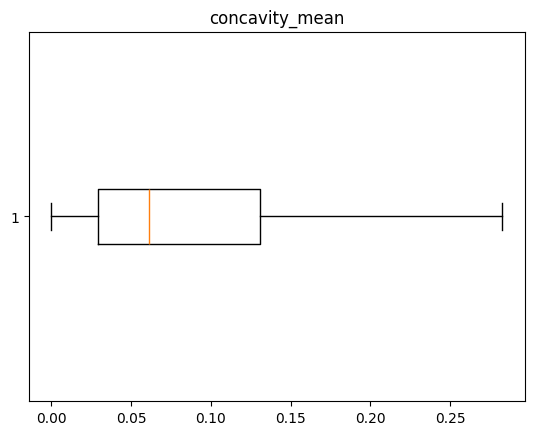

-0.060224999999999994 0.15453499999999998


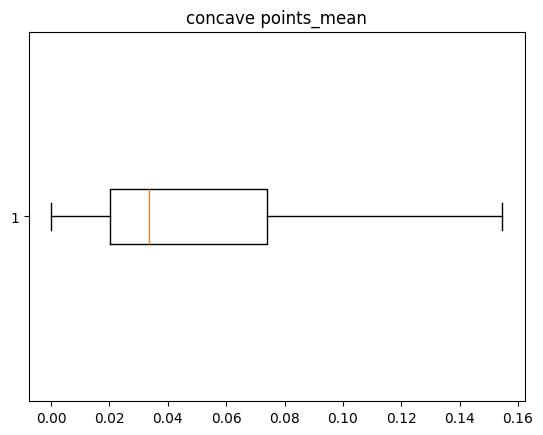

0.11119999999999995 0.24640000000000006


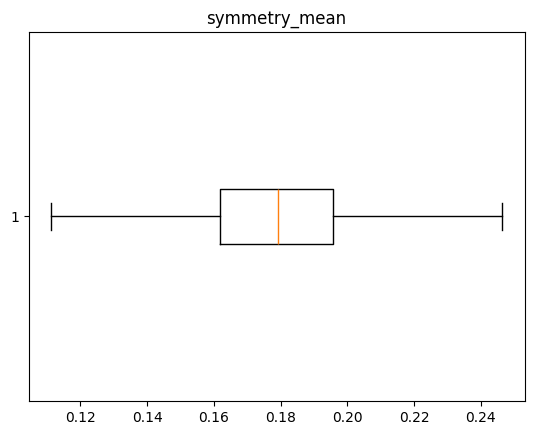

0.045070000000000006 0.07874999999999999


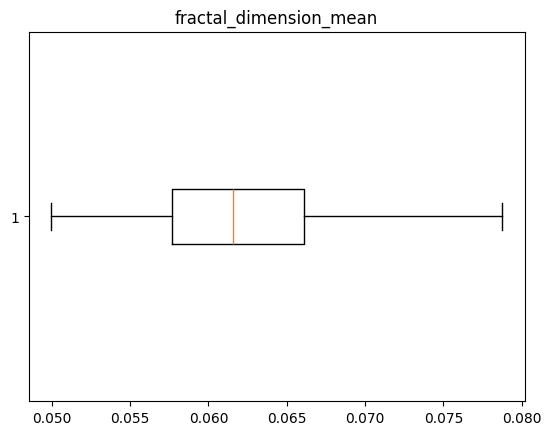

-0.13735000000000003 0.84865


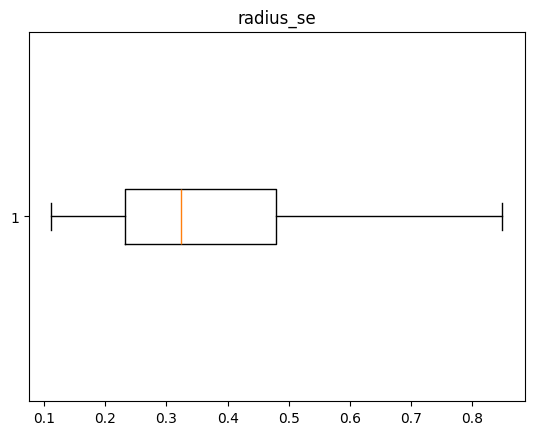

-0.12625000000000008 2.43415


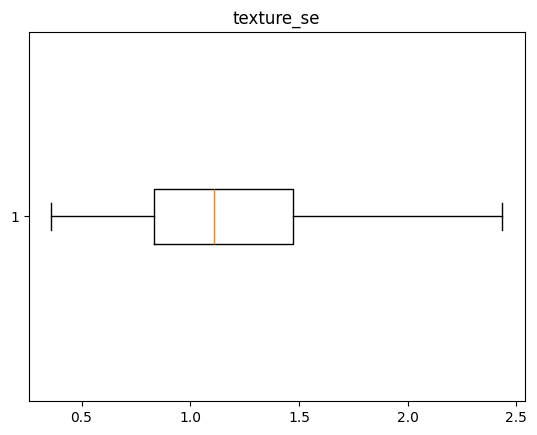

-1.0205 5.9835


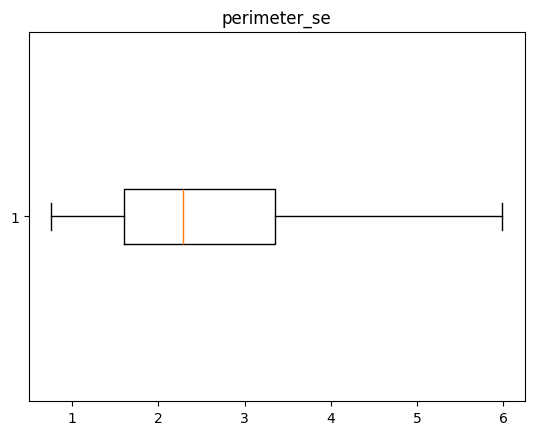

-23.15999999999999 86.19999999999999


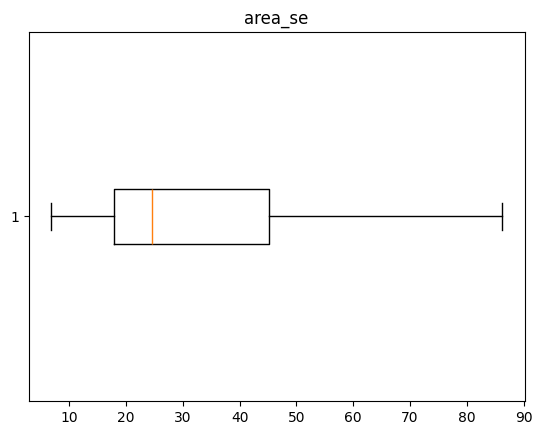

0.0007034999999999993 0.012611500000000001


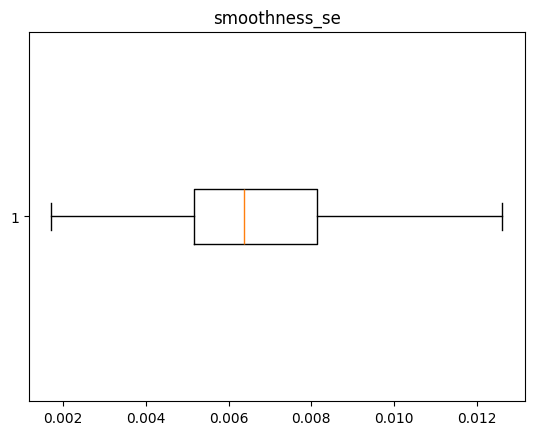

-0.015974999999999996 0.061505


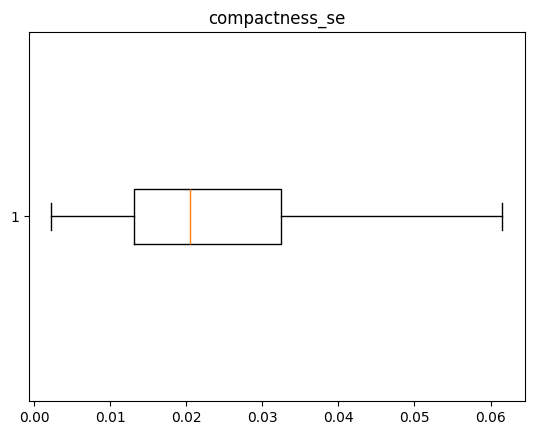

-0.025349999999999998 0.08249


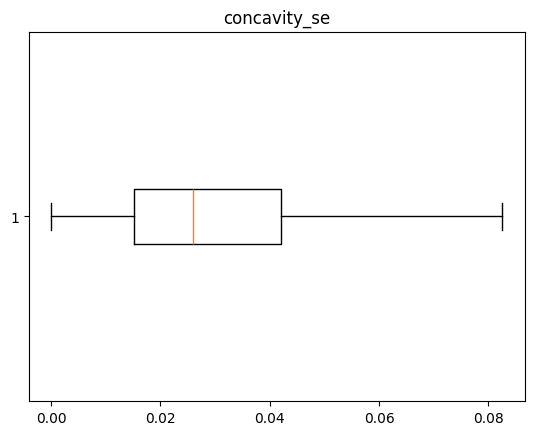

-0.0029700000000000013 0.025318


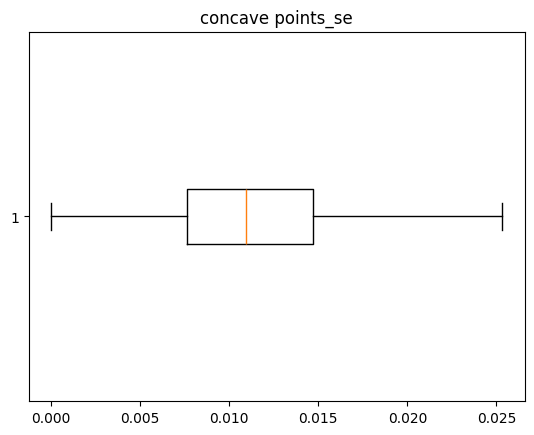

0.0026799999999999984 0.035960000000000006


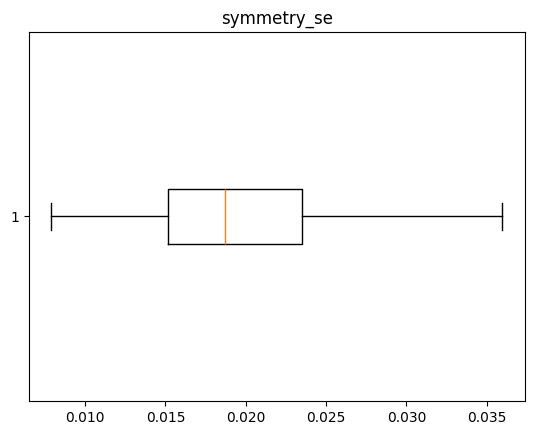

-0.0012170000000000006 0.008023


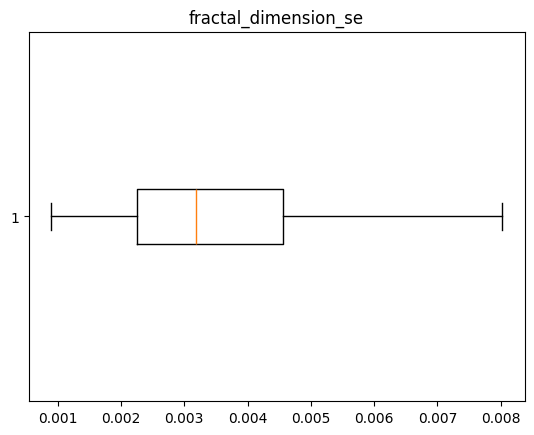

4.340000000000002 27.459999999999997


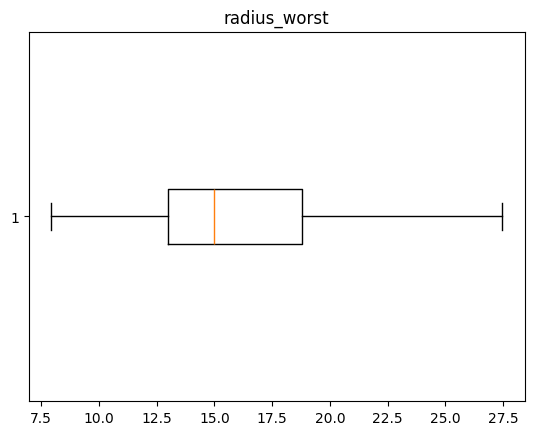

8.119999999999997 42.68


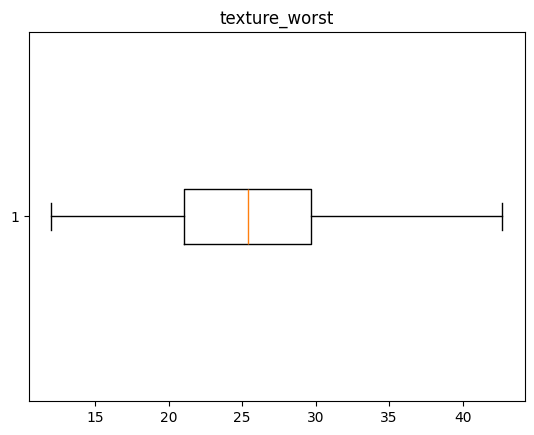

22.17499999999999 187.335


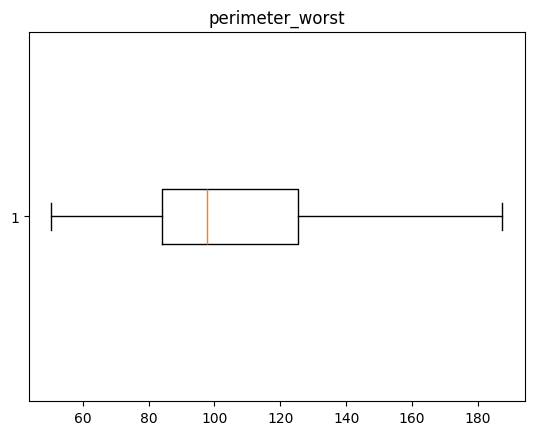

-337.7500000000001 1937.0500000000002


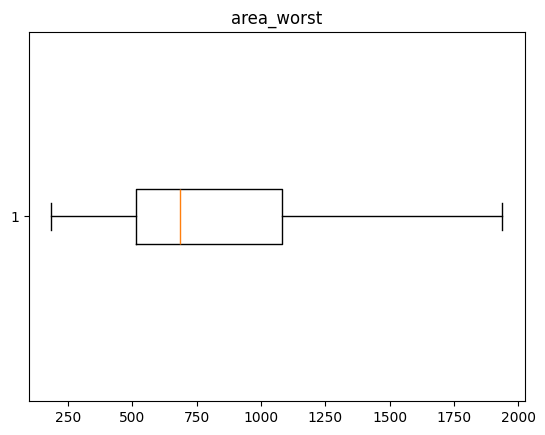

0.07250000000000001 0.1901


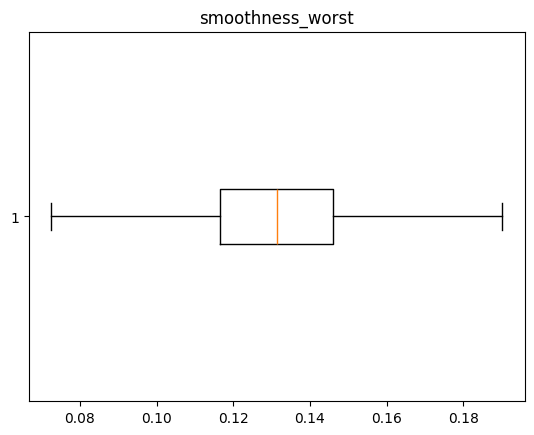

-0.14065000000000005 0.6269500000000001


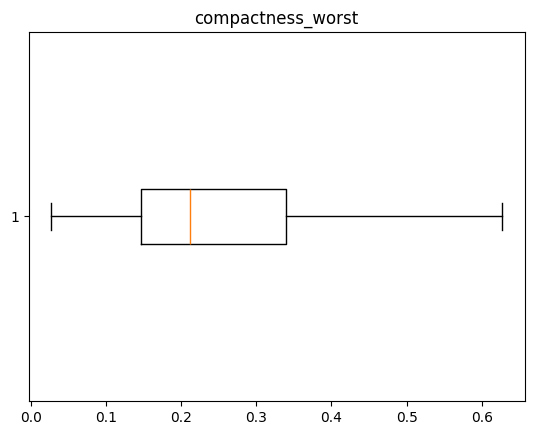

-0.2881000000000001 0.7855000000000001


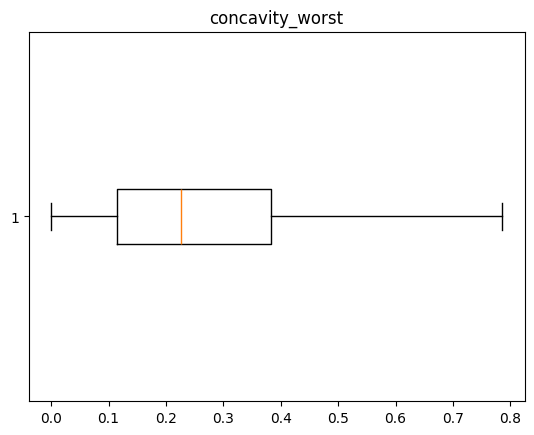

-0.07977499999999997 0.30610499999999996


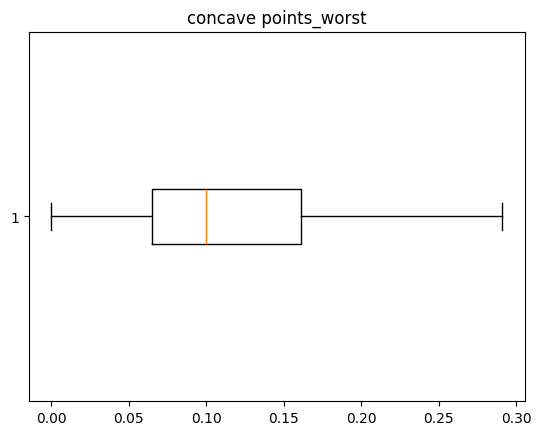

0.14915 0.41915


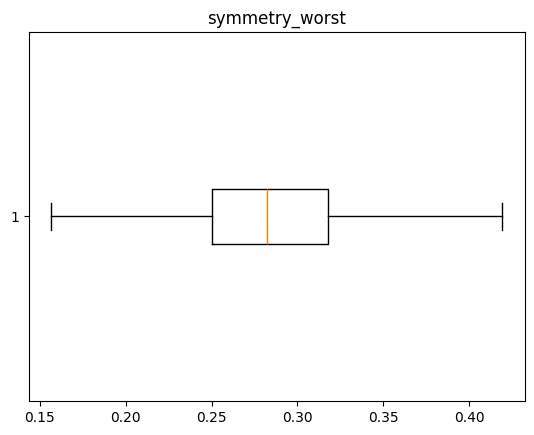

0.04053 0.12301


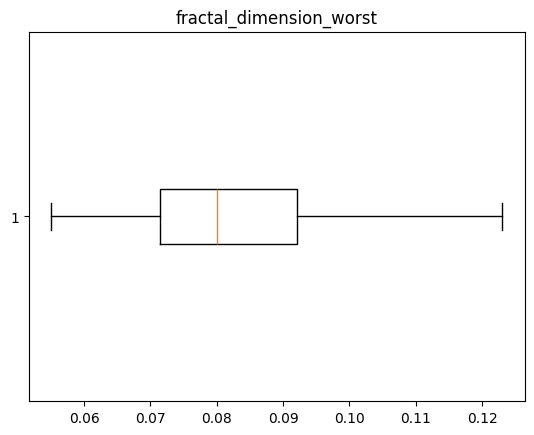

In [40]:
for i in numeric_cols:
    lw, uw = remove_outlier(df1[i])
    print(lw,uw)
    df1[i] = np.where(df1[i]<lw, lw, np.where(df1[i]>uw, uw, df1[i]))
    plt.boxplot(df1[i], vert=False)
    plt.title(i)
    plt.show()

## Checking if data is biased

In [42]:
df1.select_dtypes(include='object').describe().T

,count,unique,top,freq
diagnosis,569,2,B,357


## Performing Encoding

In [43]:
data = pd.get_dummies(data=df1, columns=['diagnosis'], drop_first=True, dtype=int)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,1
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,1
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,1
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,1
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,1


## Feature Matrix & Target Vector

In [44]:
x = data.drop('diagnosis_M', axis=1)
y = data['diagnosis_M']

### Scaling the Feature Metrics

In [45]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,...,2.006477,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,...,1.921384,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,...,1.611558,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,...,-0.277945,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,...,1.386825,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683


### Divide data into train and test set

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=12, stratify=y)

### Building model

In [48]:
from sklearn.svm import SVC

In [49]:
model1 = SVC(kernel='linear', C=0.1, probability=True, random_state=42)

In [50]:
model2 = SVC(kernel='rbf', C=0.1, probability=True, random_state=42)

In [51]:
model3 = SVC(kernel='poly', C=0.1, probability=True, random_state=42)

### <li>model1: linear</li>

In [52]:
model1.fit(x_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [59]:
ypred1 = model1.predict(x_test)

In [56]:
print(f"model1 train accuracy: {model1.score(x_train, y_train)}")
print(f"model1 test accuracy: {model1.score(x_test, y_test)}")

model1 train accuracy: 0.9874371859296482
model1 test accuracy: 0.9766081871345029


In [60]:
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### <li>model2: rbf</li>

In [61]:
model2.fit(x_train, y_train)

SVC(C=0.1, probability=True, random_state=42)

In [65]:
ypred2 = model2.predict(x_test)

In [66]:
print(f"model2 train accuracy: {model2.score(x_train, y_train)}")
print(f"model2 test accuracy: {model2.score(x_test, y_test)}")

model2 train accuracy: 0.9597989949748744
model2 test accuracy: 0.935672514619883


In [67]:
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       107
           1       0.98      0.84      0.91        64

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



### <li>model2: poly</li>

In [68]:
model3.fit(x_train, y_train)

SVC(C=0.1, kernel='poly', probability=True, random_state=42)

In [69]:
ypred3 = model3.predict(x_test)

In [70]:
print(f"model3 train accuracy: {model3.score(x_train, y_train)}")
print(f"model3 test accuracy: {model3.score(x_test, y_test)}")

model3 train accuracy: 0.8768844221105527
model3 test accuracy: 0.8070175438596491


In [71]:
print(classification_report(y_test, ypred3))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       107
           1       1.00      0.48      0.65        64

    accuracy                           0.81       171
   macro avg       0.88      0.74      0.76       171
weighted avg       0.85      0.81      0.79       171

